<table align="left" width=100%>
    <tr>
        <td width="20%">
            <img src="GL-2.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                  <b> Faculty Notebook <br> (Day 3) </b>
                </font>
            </div>
        </td>
    </tr>
</table>

## Problem Statement

Features are computed from a image of a fine needle aspirate (FNA) of a breast mass. These features describe the characteristics of the cell nuclei present in the image.

## About the dataset (Breast Cancer Data) 

**radius:** mean of distances from center to points on the perimeter<br>
**texture:** standard deviation of gray-scale values<br>
**perimeter:** Perimeter<br>
**area:** Area<br>
**smoothness:** local variation in radius lengths<br>
**compactness:** perimeter^2 / area - 1.0<br>
**concavity:** severity of concave portions of the contour<br>
**concave points:** number of concave portions of the contour<br>
**symmetry:** Symmetry<br>
**fractal dimension:** fractal dimension<br>

**Diagnosis:** The cancer is benign or malignant?(Target variable) (M = malignant, B = benign)

## Table of Content

1. **[Import Libraries](#lib)**
2. **[Data Preparation](#prep)**
    - 2.1 - **[Read the Data](#read)**
    - 2.2 - **[Check the Data Type](#dtype)**
    - 2.3 - **[Distribution of Variables](#dist)**
    - 2.4 - **[Missing Value Treatment](#null)**

3. **[K Nearest Neighbors (KNN)](#knn)**
    - 3.1 - **[Optimal Value of K (using GridSearchCV)](#hyper)**
4. **[Naive Bayes Algorithm](#NB)**
5. **[Comparison between KNN Model and Naive Bayes Model](#compare)**

<a id="lib"></a>
# 1. Import Libraries

**Let us import the required libraries.**

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.float_format = '{:.6f}'.format

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import MinMaxScaler

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score 

In [4]:
plt.rcParams['figure.figsize'] = [15,8]

<a id="prep"></a>
# 2. Data Preparation

<a id="read"></a>
## 2.1 Read the Data

#### Read the dataset and print the first five observations.

In [5]:
# load the csv file
df_cancer = pd.read_csv('bcancer.csv')
df_cancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.990000,10.380000,122.800000,1001.000000,0.118400,0.277600,0.300100,0.147100,0.241900,0.078710,1.095000,0.905300,8.589000,153.400000,0.006399,0.049040,0.053730,0.015870,0.030030,0.006193,25.380000,17.330000,184.600000,2019.000000,0.162200,0.665600,0.711900,0.265400,0.460100,0.118900
1,M,20.570000,17.770000,132.900000,1326.000000,0.084740,0.078640,0.086900,0.070170,0.181200,0.056670,0.543500,0.733900,3.398000,74.080000,0.005225,0.013080,0.018600,0.013400,0.013890,0.003532,24.990000,23.410000,158.800000,1956.000000,0.123800,0.186600,0.241600,0.186000,0.275000,0.089020
2,M,19.690000,21.250000,130.000000,1203.000000,0.109600,0.159900,0.197400,0.127900,0.206900,0.059990,0.745600,0.786900,4.585000,94.030000,0.006150,0.040060,0.038320,0.020580,0.022500,0.004571,23.570000,25.530000,152.500000,1709.000000,0.144400,0.424500,0.450400,0.243000,0.361300,0.087580
3,M,11.420000,20.380000,77.580000,386.100000,0.142500,0.283900,0.241400,0.105200,0.259700,0.097440,0.495600,1.156000,3.445000,27.230000,0.009110,0.074580,0.056610,0.018670,0.059630,0.009208,14.910000,26.500000,98.870000,567.700000,0.209800,0.866300,0.686900,0.257500,0.663800,0.173000
4,M,20.290000,14.340000,135.100000,1297.000000,0.100300,0.132800,0.198000,0.104300,0.180900,0.058830,0.757200,0.781300,5.438000,94.440000,0.011490,0.024610,0.056880,0.018850,0.017560,0.005115,22.540000,16.670000,152.200000,1575.000000,0.137400,0.205000,0.400000,0.162500,0.236400,0.076780


**Let us now see the number of variables and observations in the data.**

In [6]:
df_cancer.shape

(569, 31)

**Interpretation:** The data has 569 observations and 31 variables.

<a id="dtype"></a>
## 2.2 Check the Data Type

**Check the data type of each variable. If the data type is not as per the data definition, change the data type.**

In [7]:
df_cancer.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

**Interpretation:** All the indeppendent variables are numeric.

<a id="dist"></a>
## 2.3 Distribution of Variables

**Distribution of numeric independent variables.**

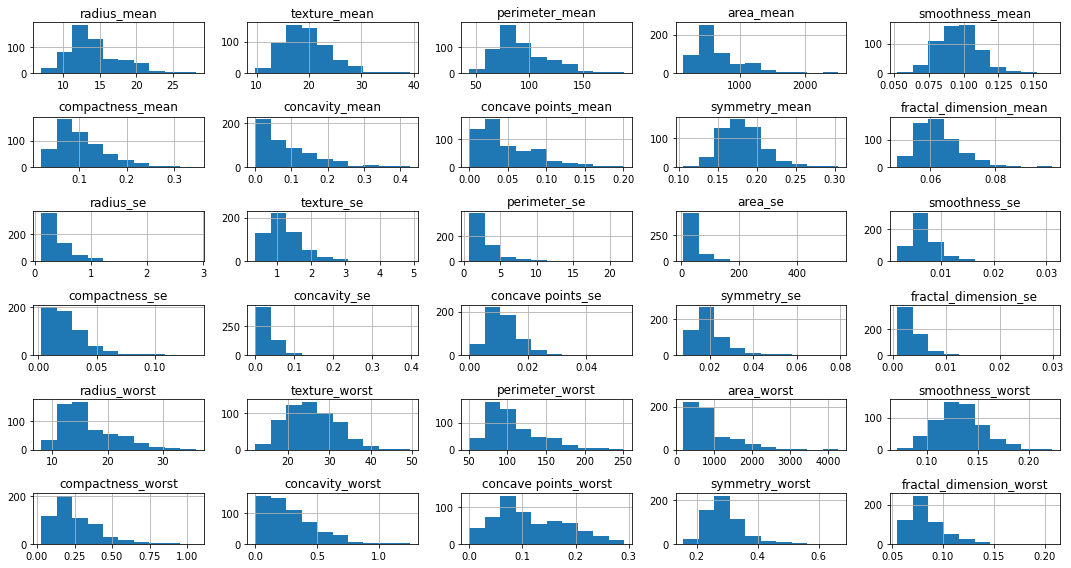

In [8]:
df_cancer.drop('diagnosis', axis = 1).hist()
plt.tight_layout()
plt.show()

#### Distribution of dependent variable.

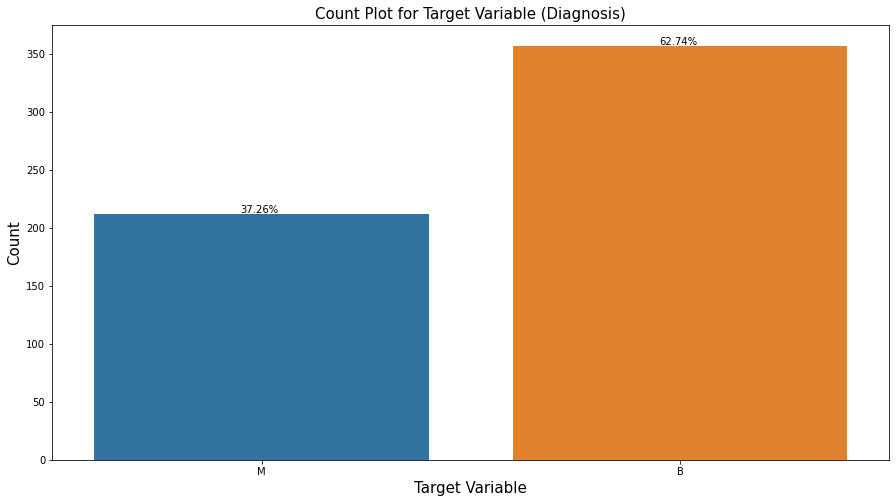

In [9]:
df_target = df_cancer['diagnosis'].copy()
df_target.value_counts()

sns.countplot(x = df_target)

plt.text(x = -0.05, y = df_target.value_counts()[1] + 1, s = str(round((df_target.value_counts()[1])*100/len(df_target),2)) + '%')
plt.text(x = 0.95, y = df_target.value_counts()[0] +1, s = str(round((df_target.value_counts()[0])*100/len(df_target),2)) + '%')

plt.title('Count Plot for Target Variable (Diagnosis)', fontsize = 15)
plt.xlabel('Target Variable', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

**Interpretation:** The above plot shows that there is not that much imbalance in the target variable.

<a id="null"></a>
## 2.4 Missing Value Treatment

First run a check for the presence of missing values and their percentage for each column. Then choose the right approach to treat them.

In [10]:
Total = df_cancer.isnull().sum().sort_values(ascending=False)          
Percent = (df_cancer.isnull().sum()*100/df_cancer.isnull().count()).sort_values(ascending=False)   
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
diagnosis,0,0.000000
compactness_se,0,0.000000
symmetry_worst,0,0.000000
concave points_worst,0,0.000000
concavity_worst,0,0.000000
compactness_worst,0,0.000000
smoothness_worst,0,0.000000
area_worst,0,0.000000
perimeter_worst,0,0.000000
texture_worst,0,0.000000


**Interpretation:** The above output shows that there are no missing values in the data.

#### Split the dependent and independent variables.

In [11]:
df_target = df_cancer['diagnosis']

df_feature = df_cancer.drop('diagnosis', axis = 1)

In [12]:
# if the value in the target variable is 'B' then replace it with 0 else with 1
# i.e. set 0 for benign (negative class)
for i in range(len(df_target)):
    if df_target[i] == 'B':
        df_target[i] = 0
    else:
        df_target[i] = 1
        
df_target = df_target.astype('int')

#### Filter numerical and categorical variables.

In [13]:
df_feature = df_feature.select_dtypes(include = [np.number])
df_feature.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

#### Create a generalized function to calculate the performance metrics for the test set.

In [14]:
# create a generalized function to calculate the performance metrics values for test set
def get_test_report(model, test_data):
    
    test_pred = model.predict(test_data)
    return(classification_report(y_test, test_pred))

#### Define a function to plot the confusion matrix.

In [15]:
# define a to plot a confusion matrix for the model
def plot_confusion_matrix(model, test_data):
    
    y_pred = model.predict(test_data)
    cm = confusion_matrix(y_test,y_pred)

    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25})
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.show()

#### Define a function to plot the ROC curve.

In [16]:
# define a function to plot the ROC curve and print the ROC-AUC score
def plot_roc(model, test_data):
    
    # predict the probability of target variable using X_test
    y_pred_prob = model.predict(test_data)

    fpr, tpr, thresholds = roc_curve(y_test,y_pred_prob)
    plt.plot(fpr, tpr)

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.plot([0, 1], [0, 1],'r--')

    plt.title('ROC curve for Cancer Prediction Classifier', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

    plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test,y_pred_prob),4)))

    plt.grid(True)

<a id="knn"></a>
# 3. K Nearest Neighbors (KNN)

KNN is a classification machine learning algorithm used to identify the class of the observation. This algorithm search for `K` nearest points to determine the class of an observation. To identify the nearest points, it considers the distance metrics like `Euclidean`, `Manhattan`, `Chebyshev`, `Hamming`, and so on.

#### Let us normalize the data 

We scale the variables to get all the variables in the same range. With this, we can avoid a problem in which some features come to dominate solely because they tend to have larger values than others.

In [17]:
# initialize the MinMaxScaler
X_norm = MinMaxScaler()

num_norm = X_norm.fit_transform(df_feature)

X = pd.DataFrame(num_norm, columns = df_feature.columns)
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,0.356147,0.120469,0.369034,0.273811,0.159296,0.351398,0.135682,0.300625,0.311645,0.183042,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,0.156437,0.082589,0.124440,0.125660,0.119387,0.081323,0.046970,0.253836,0.084539,0.091110,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,0.229622,0.094303,0.180370,0.162922,0.150831,0.283955,0.096768,0.389847,0.205690,0.127006,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,0.139091,0.175875,0.126655,0.038155,0.251453,0.543215,0.142955,0.353665,0.728148,0.287205,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,0.233822,0.093065,0.220563,0.163688,0.332359,0.167918,0.143636,0.357075,0.136179,0.145800,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


#### Train-Test Split

In [18]:
X_train_norm, X_test_norm, y_train, y_test = train_test_split(X, df_target, random_state = 10, test_size = 0.2)

print('X_train_norm', X_train_norm.shape)
print('y_train', y_train.shape)

print('X_test_norm', X_test_norm.shape)
print('y_test', y_test.shape)

X_train_norm (455, 30)
y_train (455,)
X_test_norm (114, 30)
y_test (114,)


#### Build a knn model on a training dataset using euclidean distance (Standardized Data)

In [19]:
knn_classification = KNeighborsClassifier(n_neighbors=3)
knn_model = knn_classification.fit(X_train_norm,y_train)

#### Build a confusion matrix.

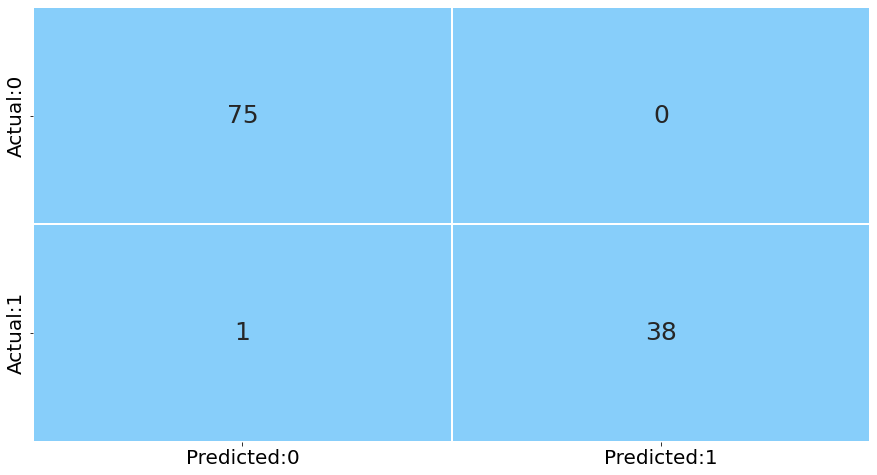

In [20]:
plot_confusion_matrix(knn_model, test_data = X_test_norm)

**Calculate performance measures on the test set.**

In [21]:
test_report = get_test_report(knn_model, test_data = X_test_norm)
print(test_report)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        75
           1       1.00      0.97      0.99        39

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



**Interpretation:** The accuracy is 99% for this model.

**Plot the ROC curve.**

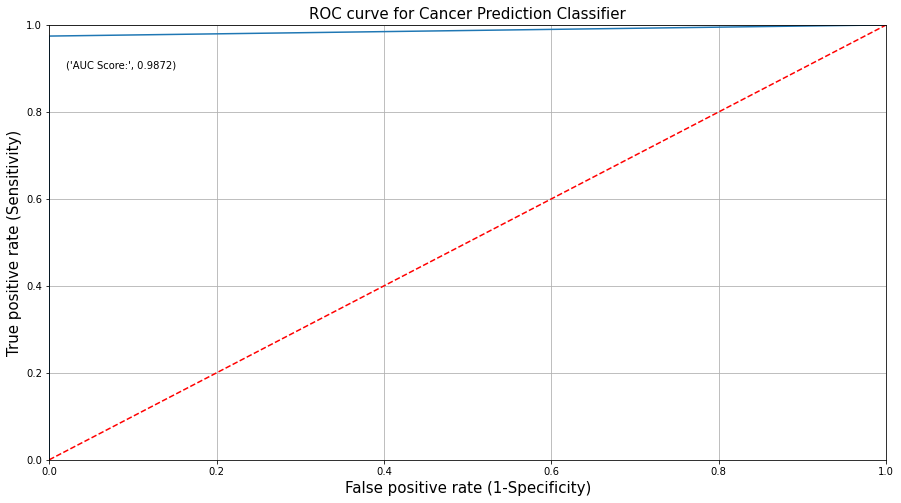

In [22]:
plot_roc(knn_model, test_data = X_test_norm)

**Interpretation:** The red dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).<br>
From the above plot, we can see that our classifier (knn_model with n_neighbors = 3) is away from the dotted line; with the AUC score 0.9991.

#### We can also perform standardization. Whether to normalize or standardize the data is completely experimental.

#### Standardize the Data 

We scale the variables to get all the variables in the same range. With this, we can avoid a problem in which some features come to dominate solely because they tend to have larger values than others.

In [23]:
# initialize the standard scalar
X_scaler = StandardScaler()

num_scaled = X_scaler.fit_transform(df_feature)

X = pd.DataFrame(num_scaled, columns = df_feature.columns)
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,2.833031,2.487578,-0.214002,1.316862,0.724026,0.660820,1.148757,0.907083,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,0.263327,0.742402,-0.605351,-0.692926,-0.440780,0.260162,-0.805450,-0.099444,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,0.850928,1.181336,-0.297005,0.814974,0.213076,1.424827,0.237036,0.293559,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,0.286593,-0.288378,0.689702,2.744280,0.819518,1.115007,4.732680,2.047511,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,1.273189,1.190357,1.483067,-0.048520,0.828471,1.144205,-0.361092,0.499328,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


#### Train-Test Split

In [24]:
X_train_std, X_test_std, y_train, y_test = train_test_split(X, df_target, random_state = 10, test_size = 0.2)

print('X_train', X_train_std.shape)
print('y_train', y_train.shape)

print('X_test', X_test_std.shape)
print('y_test', y_test.shape)

X_train (455, 30)
y_train (455,)
X_test (114, 30)
y_test (114,)


#### Build a knn model on a training dataset using euclidean distance (Standardized Data)

In [25]:
knn_classification = KNeighborsClassifier(n_neighbors = 3)

knn_model = knn_classification.fit(X_train_std, y_train)

#### Build a confusion matrix.

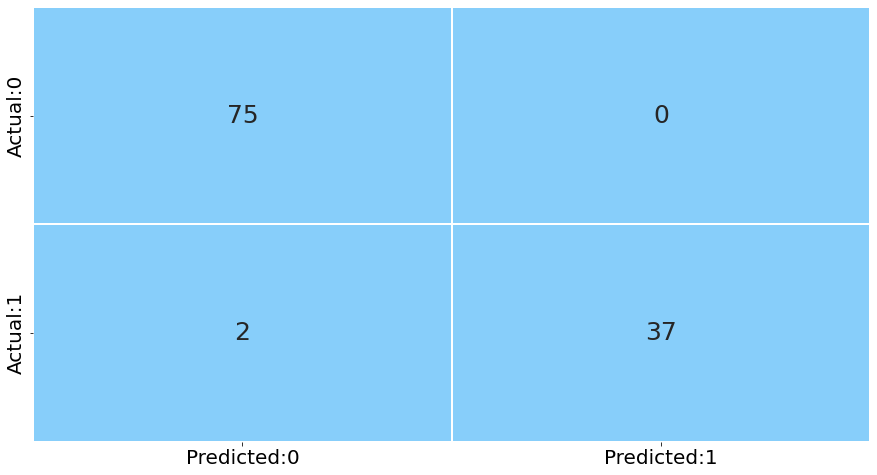

In [26]:
plot_confusion_matrix(knn_model, test_data = X_test_std)

**Calculate performance measures on the test set.**

In [27]:
test_report = get_test_report(knn_model, test_data = X_test_std)
print(test_report)

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        75
           1       1.00      0.95      0.97        39

    accuracy                           0.98       114
   macro avg       0.99      0.97      0.98       114
weighted avg       0.98      0.98      0.98       114



**Interpretation:** The accuracy is 98% for this model.

**Plot the ROC curve.**

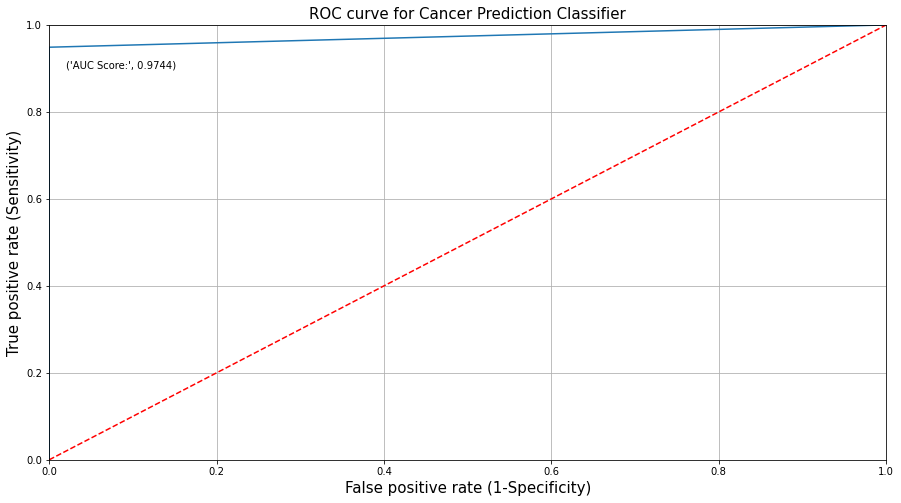

In [28]:
plot_roc(knn_model, test_data = X_test_std)

**Interpretation:** The red dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).<br>
From the above plot, we can see that our classifier (knn_model with n_neighbors = 3) is away from the dotted line; with the AUC score 0.9976.

#### We can see that the KNN model is performing well with both the normalized and standardized data. But the performance with normalized data is slightly better than that of standardized data. Thus we will consider the normalized data to find the optimal value of 'k'.

<a id="hyper"></a>
## 3.1 Optimal Value of K (using GridSearchCV)

In [29]:
tuned_paramaters = {'n_neighbors': np.arange(1, 25, 2),
                   'metric': ['hamming','euclidean','manhattan','Chebyshev']}
 
knn_classification =KNeighborsClassifier()

knn_grid = GridSearchCV(estimator=knn_classification,param_grid=tuned_paramaters,cv=5,scoring='accuracy')
knn_grid.fit(X_train_norm, y_train)

print('Best parameters for KNN Classifier: ', knn_grid.best_params_, '\n')

Best parameters for KNN Classifier:  {'metric': 'euclidean', 'n_neighbors': 7} 



#### Draw a line plot to see the error rate for each value of K using euclidean distance as a metric of KNN model

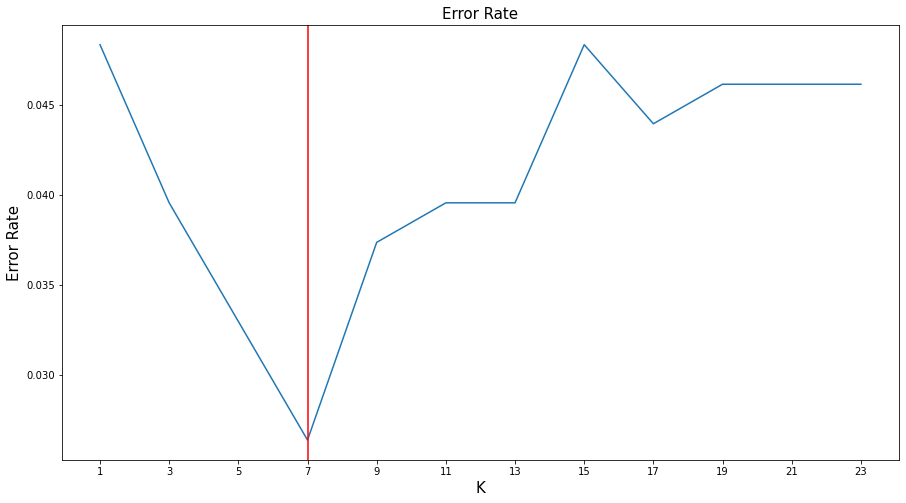

In [30]:
error_rate = []

for i in np.arange(1,25,2):
    
    knn = KNeighborsClassifier(i, metric = 'euclidean')
    score = cross_val_score(knn, X_train_norm, y_train, cv = 5)
    score = score.mean()
    error_rate.append(1 - score)

# plot the error_rate for different values of K 
plt.plot(range(1,25,2), error_rate)

plt.title('Error Rate', fontsize = 15)
plt.xlabel('K', fontsize = 15)
plt.ylabel('Error Rate', fontsize = 15)
plt.xticks(np.arange(1, 25, step = 2))

# plot a vertical line across the minimum error rate
plt.axvline(x = 7, color = 'red')
plt.show()

**Interpretation:** We can see that the optimal value of K (= 7) obtained from the GridSearchCV() results in a lowest error rate. 

**Calculate performance measures on the test set.**

In [31]:
print('Classification Report for test set: \n', get_test_report(knn_grid, test_data=X_test_norm))

Classification Report for test set: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        75
           1       1.00      1.00      1.00        39

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114



**Plot the ROC curve.**

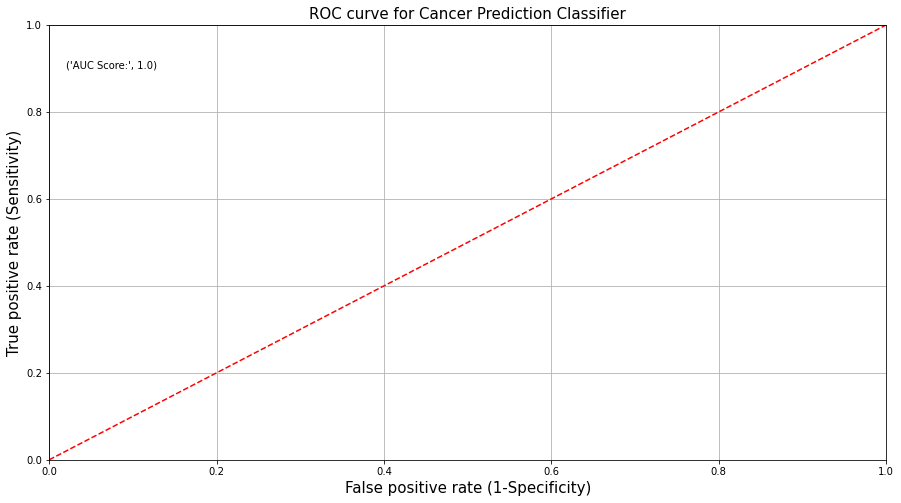

In [32]:
plot_roc(knn_grid, test_data=X_test_norm)

**Interpretation:** From the above plot, we can see that our classifier (knn_model with n_neighbors = 7) is away from the red dotted line (i.e on the axes); with the AUC score 1.0.

<a id="NB"></a>
# 4. Naive Bayes Algorithm

It uses a `Bayes' Theorem` with the assumption of independence of predictor variables. The sklearn library provides different naive bayes classifiers, as `GaussianNB`, `MultinomialNB` and so on. 

Why is it called Naïve Bayes?
The Naïve Bayes algorithm is comprised of two words Naïve and Bayes, Which can be described as:

Naïve: It is called Naïve because it assumes that the occurrence of a certain feature is independent of the occurrence of other features. Such as if the fruit is identified on the bases of color, shape, and taste, then red, spherical, and sweet fruit is recognized as an apple. Hence each feature individually contributes to identify that it is an apple without depending on each other.
Bayes: It is called Bayes because it depends on the principle of Bayes' Theorem.
Bayes' Theorem:
Bayes' theorem is also known as Bayes' Rule or Bayes' law, which is used to determine the probability of a hypothesis with prior knowledge. It depends on the conditional probability.
The formula for Bayes' theorem is given as:
Naïve Bayes Classifier Algorithm
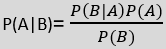
Where,

P(A|B) is Posterior probability: Probability of hypothesis A on the observed event B.

P(B|A) is Likelihood probability: Probability of the evidence given that the probability of a hypothesis is true.
P(A) is Prior Probability: Probability of hypothesis before observing the evidence.

P(B) is Marginal Probability: Probability of Evidence.

#### Build a naive bayes model on a training dataset.

In [33]:
# instantiate the 'GaussianNB'
gnb =GaussianNB()

# fit the model using fit() on train data
gnb_model = gnb.fit(X_train_norm, y_train)

#### Build a confusion matrix.

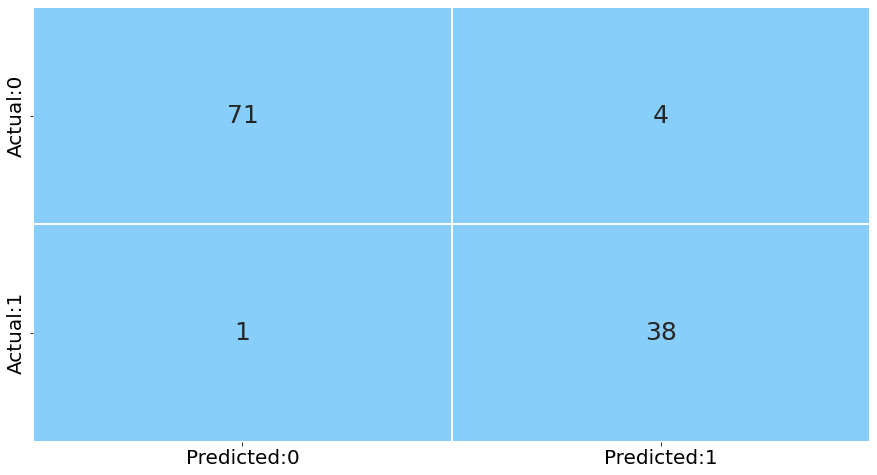

In [93]:
plot_confusion_matrix(gnb_model, test_data=X_test_norm)

**Calculate performance measures on the test set.**

In [34]:
test_report = get_test_report(gnb_model, test_data=X_test_norm)
print(test_report)

              precision    recall  f1-score   support

           0       0.99      0.95      0.97        75
           1       0.90      0.97      0.94        39

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



**Plot the ROC curve.**

In [36]:
import statsmodels.api as sm

formula='price~x+y+z'
m=sm.OLS.from_formula(formula,data).fit()
m.summary()

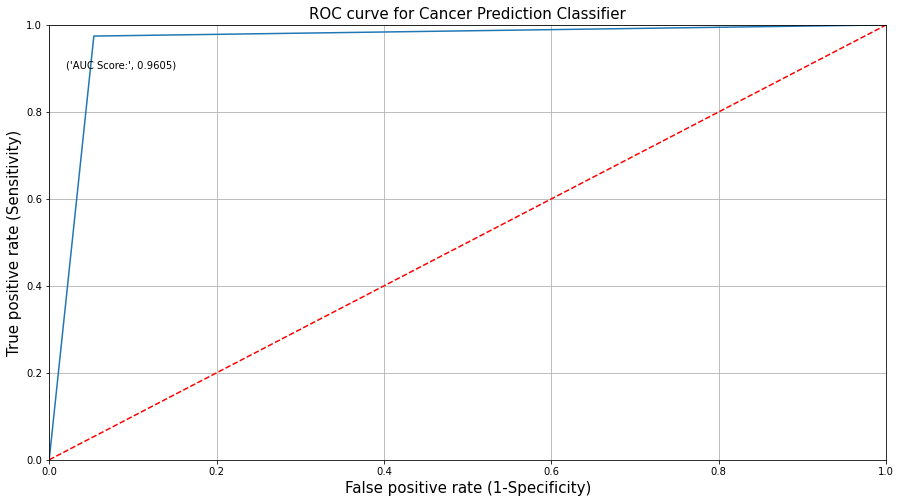

In [38]:
plot_roc(gnb_model, test_data=X_test_norm)

**Interpretation:** From the above plot, we can see that our classifier (gnb_model) is away from the red dotted line; with the AUC score 0.9781.

**Note:** Algorithms like Naive Bayes and tree based algorithms do not need feature scaling or normalization. Performing a features scaling in these algorithms may not have much effect.

<a id="compare"></a>
# 5. Comparison between KNN Model and Naive Bayes Model

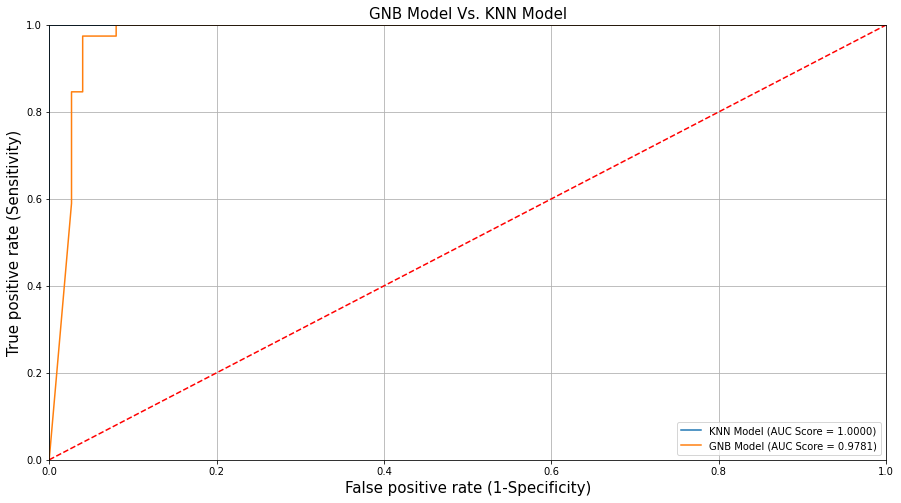

In [40]:
# K Nearest Neighbors
y_pred_prob_knn = knn_grid.predict_proba(X_test_norm)[:,1]
    
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_knn)
auc_score_knn = roc_auc_score(y_test, y_pred_prob_knn)

plt.plot(fpr, tpr, label='KNN Model (AUC Score = %0.4f)' % auc_score_knn)

y_pred_prob_gnb = gnb_model.predict_proba(X_test_norm)[:,1]


fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_gnb)
auc_score_gnb = roc_auc_score(y_test, y_pred_prob_gnb)

plt.plot(fpr, tpr, label='GNB Model (AUC Score = %0.4f)' % auc_score_gnb)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')

plt.title('GNB Model Vs. KNN Model', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

plt.legend(loc = 'lower right')
plt.grid(True)

**Interpretation:** The Auc Score of KNN Model is slightly higher than that of Gaussian Naive Bayes model. Also KNN model is more stable than Gaussian Naive Bayes model.